In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the data


In [14]:
dataset = pd.read_csv('housing.csv')

In [15]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## summarizing the stats of the data


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [17]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


# EDA

## checking for missing values


In [18]:
dataset.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE      54
dtype: int64

In [19]:
dataset['PRICE'].median()

21.95

In [20]:
dataset=dataset.fillna(dataset['PRICE'].median())
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## checking for outliers

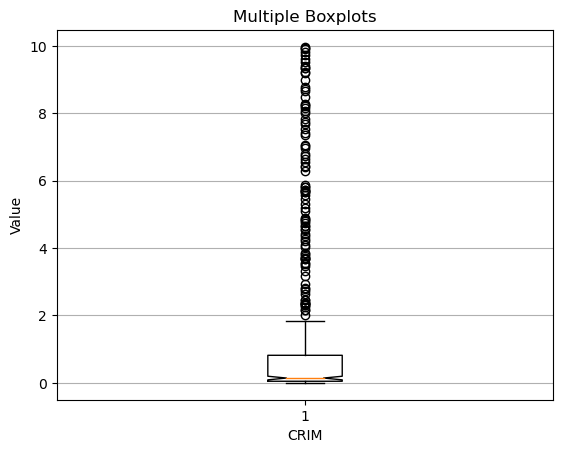

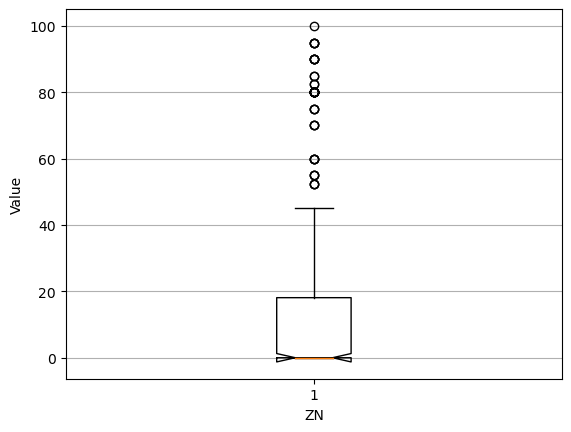

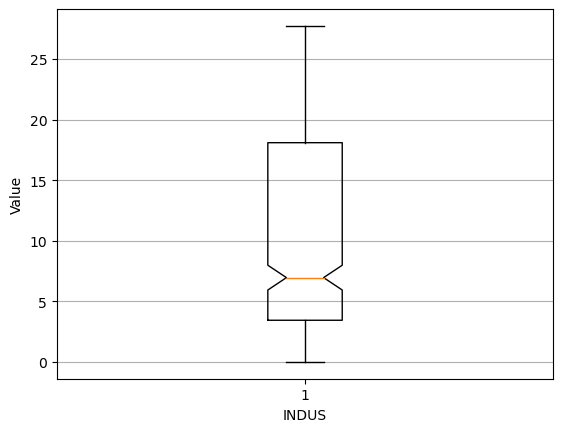

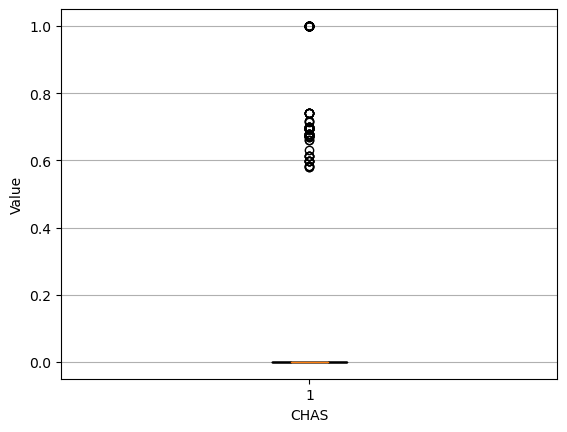

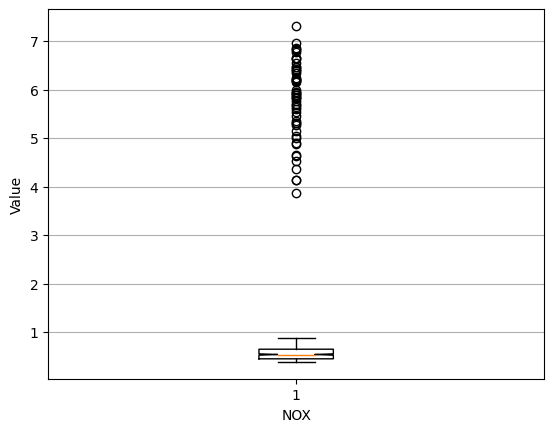

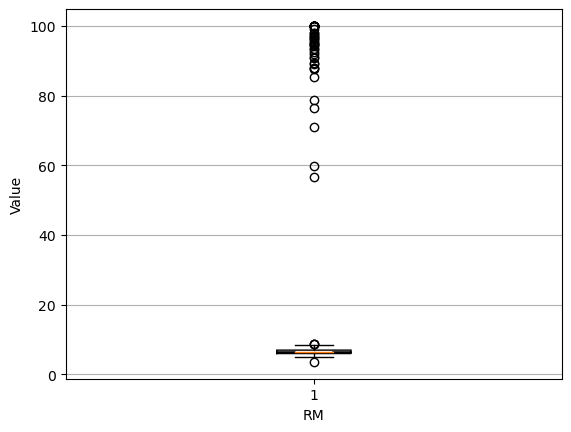

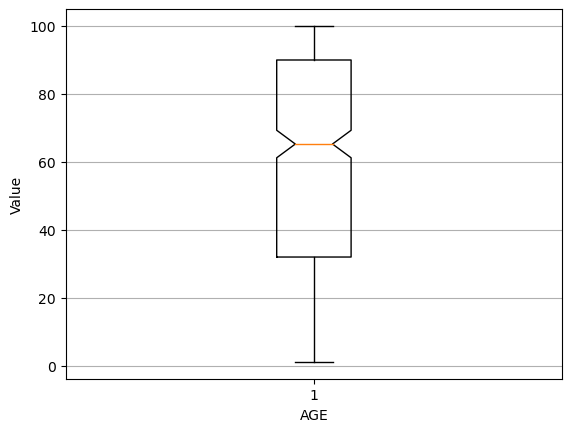

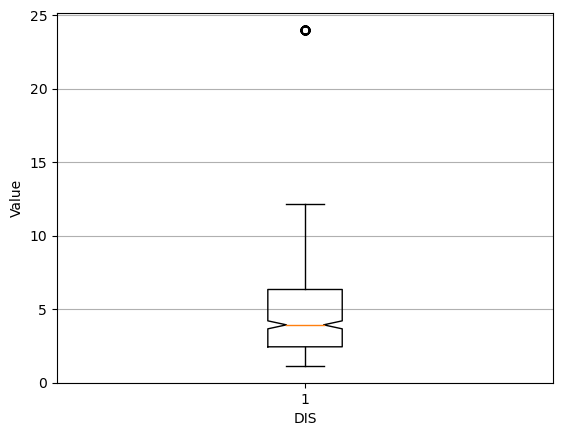

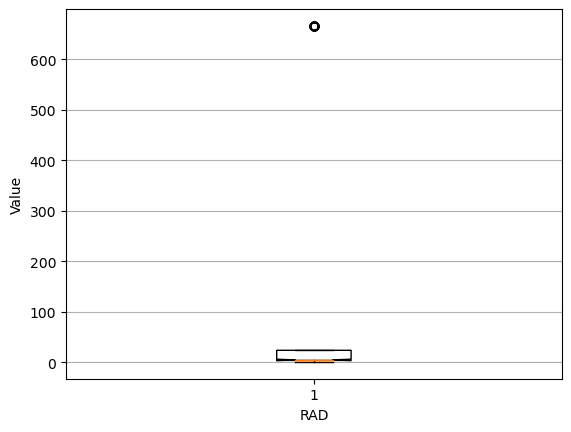

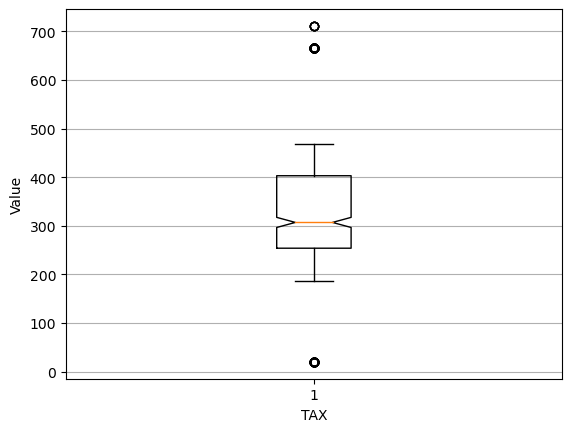

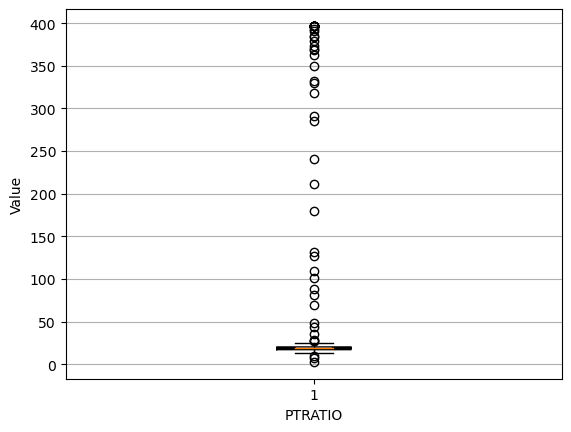

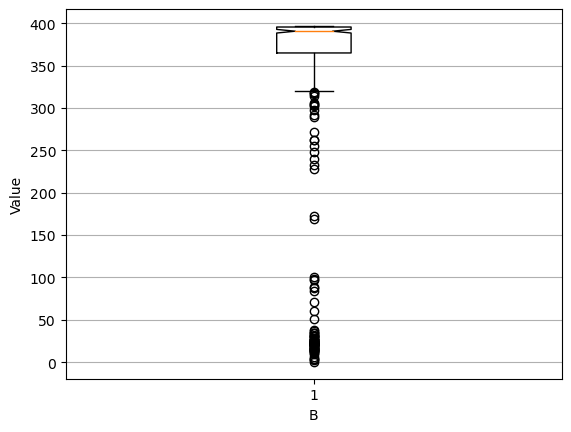

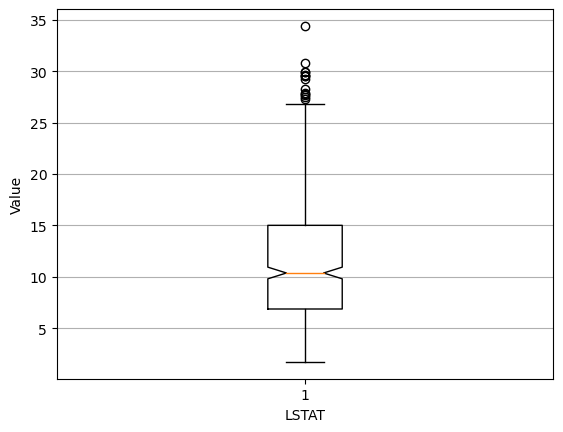

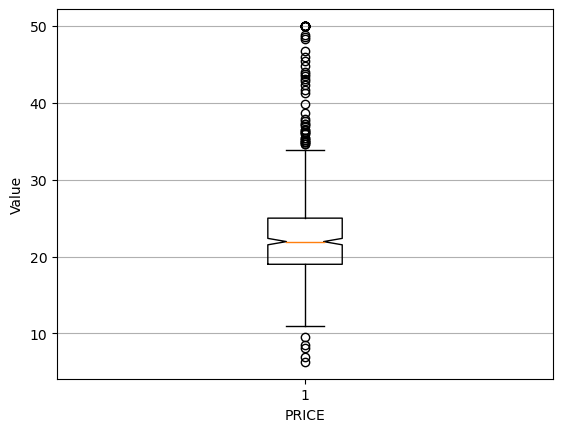

In [21]:
plt.title('Multiple Boxplots')
for col in dataset.columns:
    plt.boxplot(dataset[col],col)  
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.grid(axis='y')
    plt.show()


In [22]:
#function to calculate IQR
def cal_IQR_Upper_lower_bound(feature,multiplier):
    IQR= dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
    print("IQR: ",IQR)
    lower_bound=dataset[feature].quantile(0.25)-(IQR*multiplier)
    upper_bound=dataset[feature].quantile(0.75)+(IQR*multiplier)
    print("lower bound: ",lower_bound)
    print("upper bound: ",upper_bound)
    return lower_bound,upper_bound
    
    

## Handling missing values

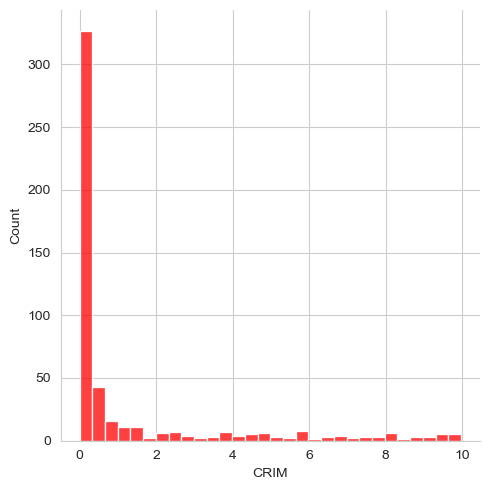

In [23]:
sns.set_style('whitegrid')
sns.displot(dataset['CRIM'], kde = False, color ='red', bins = 30)


In [24]:
#calculating IQR, upper bound and lower bound for crime rate column
lower_bound, upper_bound=cal_IQR_Upper_lower_bound('CRIM',3)

IQR:  0.7701800000000001
lower bound:  -2.2610975000000004
upper bound:  3.1301625000000004


In [25]:
dataset.loc[dataset['CRIM']> upper_bound,'CRIM']=upper_bound

In [26]:
dataset['CRIM'].describe()

count    506.000000
mean       0.762338
std        1.138541
min        0.000000
25%        0.049443
50%        0.144655
75%        0.819623
max        3.130163
Name: CRIM, dtype: float64

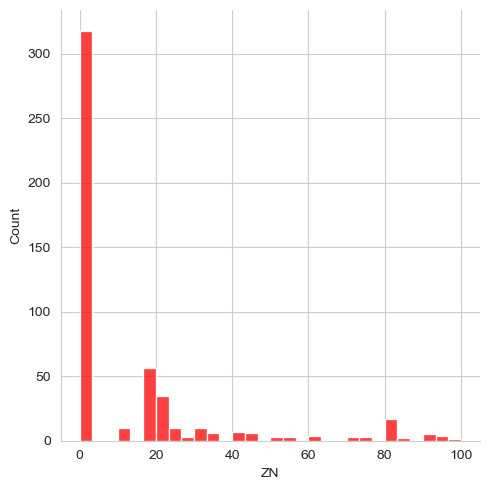

In [27]:
sns.set_style('whitegrid')
sns.displot(dataset['ZN'], kde = False, color ='red', bins = 30)

In [28]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("ZN",1.5)


IQR:  18.1
lower bound:  -27.150000000000002
upper bound:  45.25


In [29]:
dataset.loc[dataset['ZN']> upper_bound,'ZN']=upper_bound

In [30]:
dataset['ZN'].describe()

count    506.000000
mean      10.476581
std       15.436941
min        0.000000
25%        0.000000
50%        0.000000
75%       18.100000
max       45.250000
Name: ZN, dtype: float64

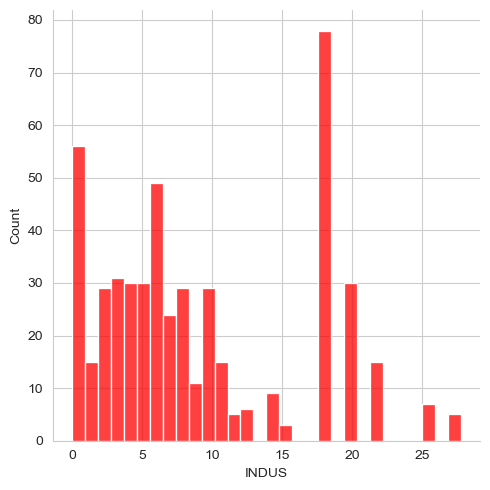

In [31]:
sns.set_style('whitegrid')
sns.displot(dataset['INDUS'], kde = False, color ='red', bins = 30)

In [32]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("INDUS",1.5)

IQR:  14.660000000000002
lower bound:  -18.55
upper bound:  40.09


In [33]:
dataset.loc[dataset['INDUS']> upper_bound,'INDUS']=upper_bound

In [34]:
dataset['INDUS'].describe()

count    506.000000
mean       9.205158
std        7.169630
min        0.000000
25%        3.440000
50%        6.960000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

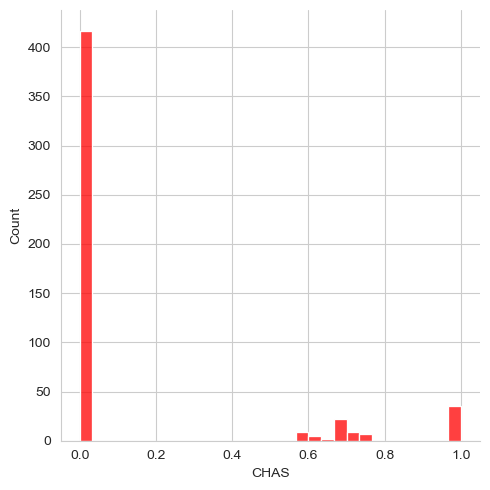

In [35]:
sns.set_style('whitegrid')
sns.displot(dataset['CHAS'], kde = False, color ='red', bins = 30)

In [36]:
dataset['CHAS'].count()

506

In [37]:
dataset.drop(['CHAS'], axis=1, inplace=True)

In [38]:
dataset.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


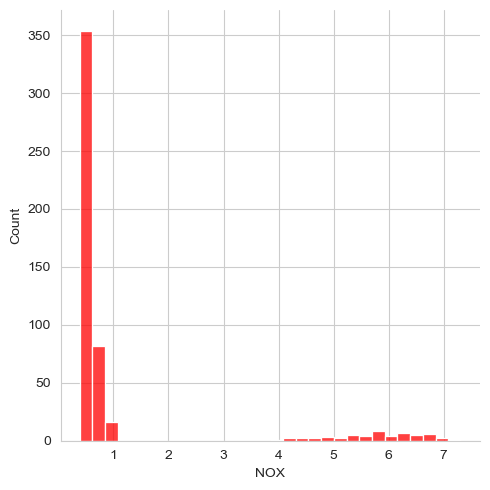

In [39]:
sns.set_style('whitegrid')
sns.displot(dataset['NOX'], kde = False, color ='red', bins = 30)

In [40]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("NOX",1.5)

IQR:  0.198
lower bound:  0.15199999999999997
upper bound:  0.9440000000000001


In [41]:
dataset.loc[dataset['NOX']> upper_bound,'NOX']=upper_bound

In [42]:
dataset['NOX'].describe()

count    506.000000
mean       0.583843
std        0.164609
min        0.385000
25%        0.449000
50%        0.538000
75%        0.647000
max        0.944000
Name: NOX, dtype: float64

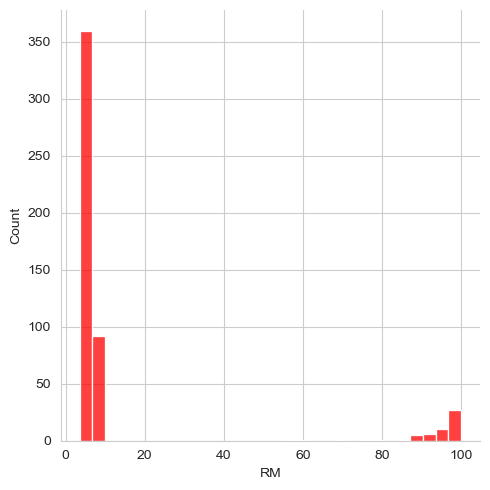

In [43]:
sns.set_style('whitegrid')
sns.displot(dataset['RM'], kde = False, color ='red', bins = 30)

In [44]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("RM",1.5)

IQR:  0.9874999999999998
lower bound:  4.48025
upper bound:  8.43025


In [45]:
dataset.loc[dataset['RM']> upper_bound,'RM']=upper_bound

In [46]:
dataset['RM'].describe()

count    506.000000
mean       6.564416
std        0.897590
min        3.561000
25%        5.961500
50%        6.322500
75%        6.949000
max        8.430250
Name: RM, dtype: float64

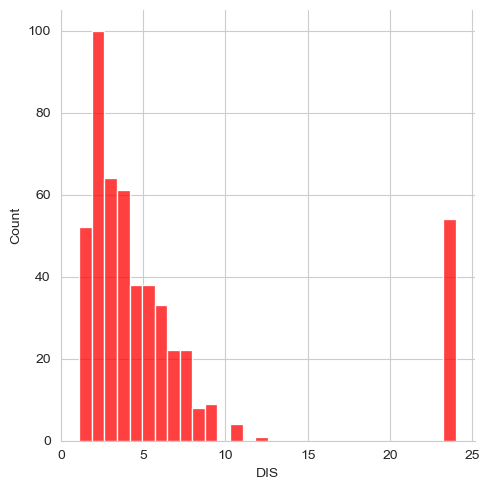

In [47]:
sns.set_style('whitegrid')
sns.displot(dataset['DIS'], kde = False, color ='red', bins = 30)

In [48]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("DIS",1.5)

IQR:  3.9014999999999995
lower bound:  -3.4216749999999996
upper bound:  12.184325


In [49]:
dataset.loc[dataset['DIS']> upper_bound,'DIS']=upper_bound

In [50]:
dataset['DIS'].describe()

count    506.000000
mean       4.912347
std        3.198919
min        1.129600
25%        2.430575
50%        3.925850
75%        6.332075
max       12.184325
Name: DIS, dtype: float64

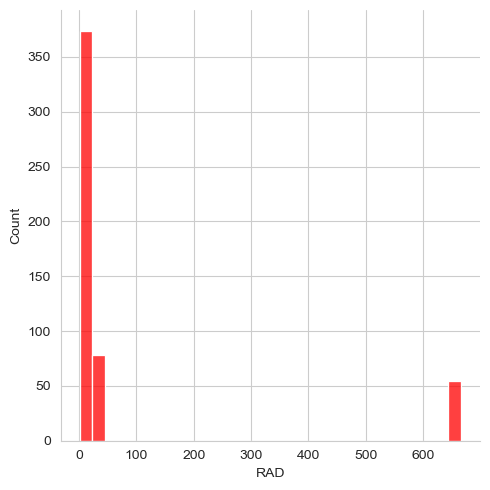

In [51]:
sns.set_style('whitegrid')
sns.displot(dataset['RAD'], kde = False, color ='red', bins = 30)

In [52]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("RAD",1.5)

IQR:  20.0
lower bound:  -26.0
upper bound:  54.0


In [53]:
dataset.loc[dataset['RAD']> upper_bound,'RAD']=upper_bound

In [54]:
dataset['RAD'].describe()

count    506.000000
mean      12.750988
std       15.952940
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       54.000000
Name: RAD, dtype: float64

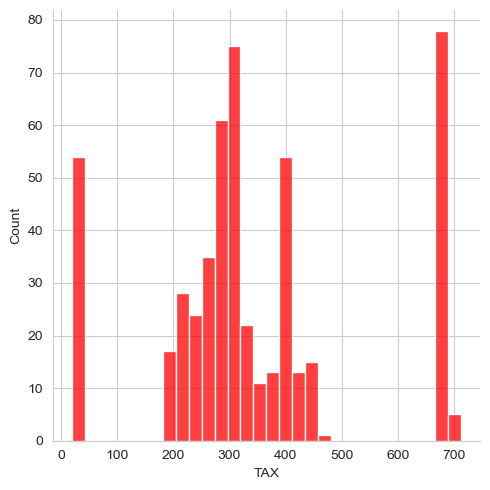

In [55]:
sns.set_style('whitegrid')
sns.displot(dataset['TAX'], kde = False, color ='red', bins = 30)

In [56]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("TAX",1.5)

IQR:  149.0
lower bound:  30.5
upper bound:  626.5


In [57]:
dataset.loc[dataset['TAX']< lower_bound,'TAX']=lower_bound
dataset.loc[dataset['TAX']> upper_bound,'TAX']=upper_bound

In [58]:
dataset['TAX'].describe()

count    506.000000
mean     333.493083
std      166.191678
min       30.500000
25%      254.000000
50%      307.000000
75%      403.000000
max      626.500000
Name: TAX, dtype: float64

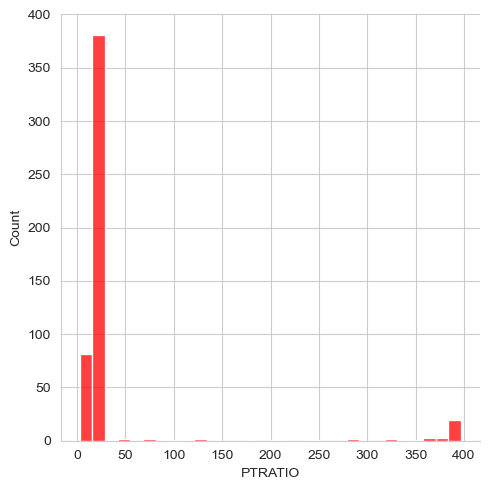

In [59]:
sns.set_style('whitegrid')
sns.displot(dataset['PTRATIO'], kde = False, color ='red', bins = 30)

In [60]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("PTRATIO",3)

IQR:  3.1999999999999993
lower bound:  7.400000000000002
upper bound:  29.799999999999997


In [61]:
dataset.loc[dataset['PTRATIO']> upper_bound,'PTRATIO']=upper_bound

In [62]:
dataset['PTRATIO'].describe()

count    506.000000
mean      19.255968
std        4.056539
min        2.600000
25%       17.000000
50%       18.900000
75%       20.200000
max       29.800000
Name: PTRATIO, dtype: float64

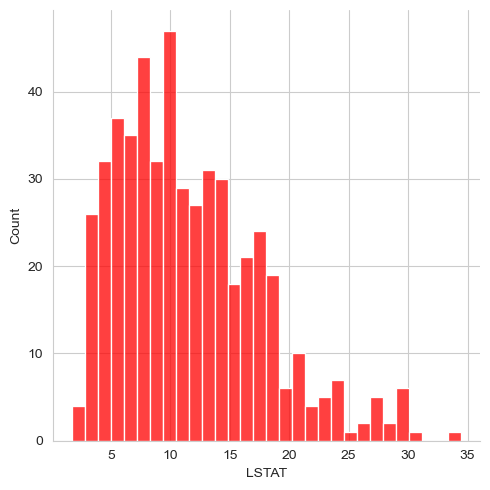

In [63]:
sns.set_style('whitegrid')
sns.displot(dataset['LSTAT'], kde = False, color ='red', bins = 30)

In [64]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("LSTAT",1.5)

IQR:  8.1375
lower bound:  -5.3287499999999985
upper bound:  27.221249999999998


In [65]:
dataset.loc[dataset['LSTAT']> upper_bound,'LSTAT']=upper_bound

In [66]:
dataset['LSTAT'].describe()

count    506.000000
mean      11.481359
std        5.899360
min        1.730000
25%        6.877500
50%       10.380000
75%       15.015000
max       27.221250
Name: LSTAT, dtype: float64

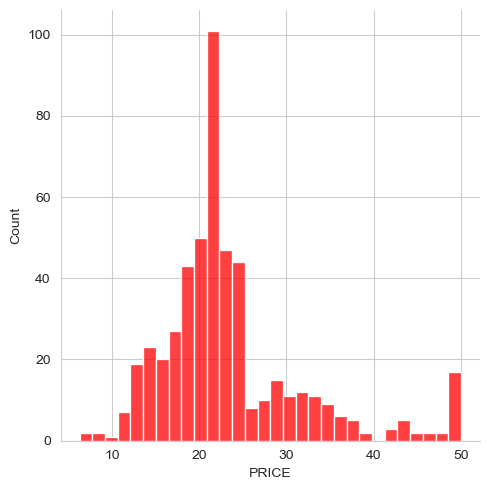

In [67]:
sns.set_style('whitegrid')
sns.displot(dataset['PRICE'], kde = False, color ='red', bins = 30)

In [68]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("PRICE",3)

IQR:  6.0
lower bound:  1.0
upper bound:  43.0


In [69]:
dataset.loc[dataset['PRICE']> upper_bound,'PRICE']=upper_bound

In [70]:
dataset['PRICE'].describe()

count    506.000000
mean      23.277866
std        7.536472
min        6.300000
25%       19.000000
50%       21.950000
75%       25.000000
max       43.000000
Name: PRICE, dtype: float64

## correlation

In [71]:
dataset.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.407638,0.682411,0.305055,-0.296407,0.540754,-0.501744,0.174978,0.777960,-0.038693,-0.024529,0.403859,-0.296939
ZN,-0.407638,1.000000,-0.563148,-0.211302,0.343675,-0.558326,0.543785,0.028028,-0.341228,-0.076195,-0.058845,-0.409970,0.348579
INDUS,0.682411,-0.563148,1.000000,0.096067,-0.548924,0.700699,-0.719735,-0.191890,0.747131,-0.174218,0.233471,0.468972,-0.380444
NOX,0.305055,-0.211302,0.096067,1.000000,0.421984,-0.080194,0.294430,0.835615,-0.163314,0.579861,-0.768938,0.377824,-0.289047
RM,-0.296407,0.343675,-0.548924,0.421984,1.000000,-0.535717,0.627005,0.612624,-0.573210,0.398298,-0.576261,-0.371821,0.475243
AGE,0.540754,-0.558326,0.700699,-0.080194,-0.535717,1.000000,-0.825994,-0.404294,0.642904,-0.349970,0.417216,0.418269,-0.238254
DIS,-0.501744,0.543785,-0.719735,0.294430,0.627005,-0.825994,1.000000,0.596435,-0.708733,0.518278,-0.598277,-0.215460,0.060531
RAD,0.174978,0.028028,-0.191890,0.835615,0.612624,-0.404294,0.596435,1.000000,-0.264677,0.733065,-0.847081,0.181638,-0.166236
TAX,0.777960,-0.341228,0.747131,-0.163314,-0.573210,0.642904,-0.708733,-0.264677,1.000000,-0.304698,0.392117,0.280996,-0.261788
PTRATIO,-0.038693,-0.076195,-0.174218,0.579861,0.398298,-0.349970,0.518278,0.733065,-0.304698,1.000000,-0.638778,0.206519,-0.286827


In [72]:
columns_to_drop=['DIS','RAD','B']
dataset.drop(columns_to_drop, axis=1, inplace=True)

In [73]:
dataset.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2


<Axes: xlabel='RM', ylabel='PRICE'>

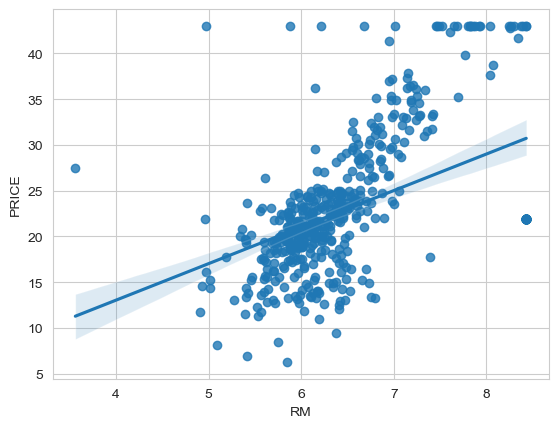

In [74]:
sns.regplot(x= "RM" , y= "PRICE" , data= dataset)

<Axes: xlabel='LSTAT', ylabel='PRICE'>

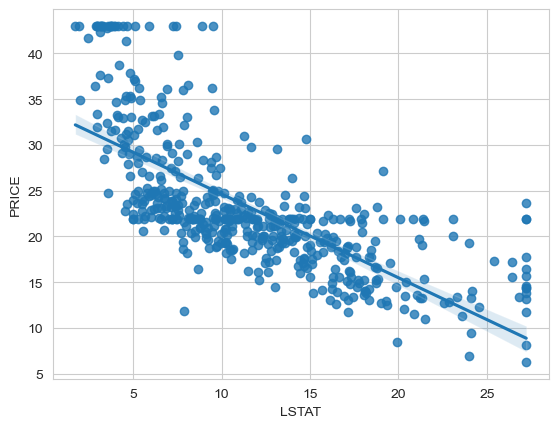

In [75]:
sns.regplot(x= "LSTAT" , y= "PRICE" , data= dataset)

In [76]:
##Independent and dependent features

X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [77]:
X

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,273.0,21.0,6.48


In [78]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [79]:
## train test split


from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test= train_test_split(X,Y ,test_size=0.3,random_state=42)

In [80]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
5,0.02985,0.00,2.18,0.458,6.43000,58.7000,222.0,18.7,5.21
116,0.13158,0.00,10.01,0.547,6.17600,72.5000,432.0,17.8,12.04
45,0.17142,0.00,6.91,0.448,5.68200,33.8000,233.0,17.9,10.21
16,1.05393,0.00,8.14,0.538,5.93500,29.3000,307.0,21.0,6.58
468,0.00000,18.10,0.00,0.944,8.43025,2.9084,30.5,29.8,19.10
...,...,...,...,...,...,...,...,...,...
106,0.17120,0.00,8.56,0.520,5.83600,91.9000,384.0,20.9,18.66
270,0.29916,20.00,6.96,0.464,5.85600,42.1000,223.0,18.6,13.00
348,0.01501,45.25,2.01,0.435,6.63500,29.7000,280.0,17.0,5.99
435,0.00000,18.10,0.00,0.944,8.43025,2.1247,30.5,29.8,13.40


In [81]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
173,0.091780,0.0,4.05,0.510,6.41600,84.1,296.0,16.6,9.04
274,0.056440,40.0,6.41,0.447,6.75800,32.9,254.0,17.6,3.53
491,0.105740,0.0,27.74,0.609,5.98300,98.8,626.5,20.1,18.07
72,0.091640,0.0,10.81,0.413,6.06500,7.8,305.0,19.2,5.52
452,3.130163,0.0,18.10,0.713,6.29700,91.8,626.5,20.2,17.27
...,...,...,...,...,...,...,...,...,...
441,3.130163,0.0,18.10,0.740,6.40600,97.2,626.5,20.2,19.52
23,0.988430,0.0,8.14,0.538,5.81300,100.0,307.0,21.0,19.88
225,0.526930,0.0,6.20,0.504,8.43025,83.0,307.0,17.4,4.63
433,3.130163,0.0,18.10,0.713,6.43600,87.9,626.5,20.2,16.22


## Standardizing the dataset 


In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [83]:
X_train=scaler.fit_transform(X_train)

In [84]:
X_test=scaler.transform(X_test)

# model training


In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
regression = LinearRegression()

In [87]:
regression.fit(X_train,y_train)

LinearRegression()

In [88]:
import pickle 
pickle.dump(scaler,open('scaling.pkl','wb'))

## print the coefficients and intercept


In [89]:
print(regression.coef_)

[ 1.03208133 -0.0829312   0.79395681 -2.33239225  4.70869792  0.62355654
 -1.10442184 -1.99498903 -3.18960576]


In [90]:
print(regression.intercept_)

23.697033898305087


## prediction on test data


In [91]:
reg_pred = regression.predict(X_test)

## plot scatter-plot for prediction


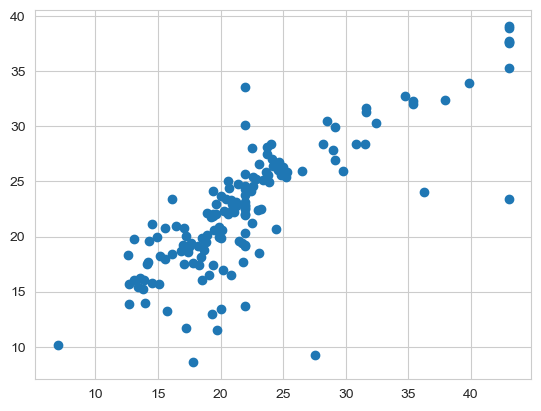

In [92]:
plt.scatter(y_test, reg_pred)

In [93]:
##residual
residual = y_test-reg_pred
residual

173   -2.243530
274    2.055149
491   -2.674874
72    -2.442054
452   -2.292394
         ...   
441   -0.375022
23    -1.305830
225    3.934425
433   -5.315469
447   -5.703793
Name: PRICE, Length: 152, dtype: float64

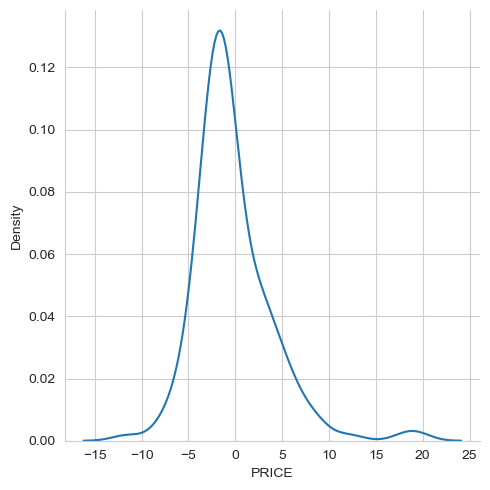

In [94]:
##plot graph for residual
sns.displot(residual, kind='kde')

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
## root mean squared error
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

2.999203782686927
17.179885043829263
4.144862487927586


# Pickling the model file for deployment

In [96]:
pickle.dump(regression,open('regmodel.pkl','wb'))